In [1]:
import pandas as pd

In [2]:
physicians = pd.read_csv('../data/primary_care_physicians.csv')

 2. Filter `physicians` down to just the counties in Tennessee. Save the filtered dataframe back to `physicians`. Verify that the resulting dataframe has 95 rows.

In [3]:
physicians = physicians.loc[physicians['state'] == 'Tennessee']

In [4]:
physicians.head()

,FIPS,state,county,primary_care_physicians
2432,47001,Tennessee,Anderson,39.0
2433,47003,Tennessee,Bedford,15.0
2434,47005,Tennessee,Benton,3.0
2435,47007,Tennessee,Bledsoe,1.0
2436,47009,Tennessee,Blount,90.0


In [5]:
physicians.shape

(95, 4)

 3. Look at the distribution of the number of primary care physicians. What do you notice?

In [6]:
physicians['primary_care_physicians'].value_counts()

2.0      8
5.0      7
9.0      5
0.0      4
12.0     4
4.0      4
18.0     4
1.0      4
3.0      4
21.0     3
6.0      3
15.0     3
19.0     2
14.0     2
26.0     2
23.0     2
38.0     2
8.0      2
39.0     2
22.0     2
55.0     1
806.0    1
13.0     1
91.0     1
520.0    1
27.0     1
53.0     1
11.0     1
137.0    1
82.0     1
199.0    1
52.0     1
90.0     1
403.0    1
16.0     1
40.0     1
37.0     1
7.0      1
30.0     1
226.0    1
338.0    1
10.0     1
43.0     1
129.0    1
665.0    1
17.0     1
Name: primary_care_physicians, dtype: int64

In [7]:
physicians['primary_care_physicians'].describe()

count     95.000000
mean      51.042105
std      129.311426
min        0.000000
25%        4.500000
50%       12.000000
75%       26.500000
max      806.000000
Name: primary_care_physicians, dtype: float64

In [8]:
physicians[physicians['primary_care_physicians'] == 0]

,FIPS,state,county,primary_care_physicians
2448,47033,Tennessee,Crockett,0.0
2462,47061,Tennessee,Grundy,0.0
2479,47095,Tennessee,Lake,0.0
2519,47175,Tennessee,Van Buren,0.0


 4. Now, import the population by county dataset (`population_by_county.csv`) into a DataFrame named `population`.

In [9]:
population = pd.read_csv('../data/population_by_county.csv')

In [10]:
population.head()

,FIPS,population,county,state,urban
0,17051,21565,Fayette County,ILLINOIS,Rural
1,17107,29003,Logan County,ILLINOIS,Rural
2,17165,23994,Saline County,ILLINOIS,Rural
3,17097,701473,Lake County,ILLINOIS,Urban
4,17127,14219,Massac County,ILLINOIS,Rural


 5. Merge the `physicians` DataFrame with the `population` DataFrame. Keep only the values for Tennessee. When you merge, be sure the include both the `population` and `urban` columns in the merged results. Save the result of the merge back to `physicians`.

In [11]:
population = population.loc[population['state'] == 'TENNESSEE']

In [12]:
population.head()

,FIPS,population,county,state,urban
283,47165,183437,Sumner County,TENNESSEE,Urban
284,47169,10231,Trousdale County,TENNESSEE,Urban
285,47027,7654,Clay County,TENNESSEE,Rural
405,47157,936374,Shelby County,TENNESSEE,Urban
406,47077,27977,Henderson County,TENNESSEE,Rural


first filter state and save as new df, need to change state case? county also needs to drop county from name.

In [13]:
physicians['state'] = physicians['state'].str.upper()

In [14]:
physicians.head()

,FIPS,state,county,primary_care_physicians
2432,47001,TENNESSEE,Anderson,39.0
2433,47003,TENNESSEE,Bedford,15.0
2434,47005,TENNESSEE,Benton,3.0
2435,47007,TENNESSEE,Bledsoe,1.0
2436,47009,TENNESSEE,Blount,90.0


In [15]:
population['county'].str.rsplit(' ', n = 1, expand = True)

,0,1
283,Sumner,County
284,Trousdale,County
285,Clay,County
405,Shelby,County
406,Henderson,County
...,...,...
3195,Monroe,County
3196,Henry,County
3197,Crockett,County
3198,Lake,County


Above code removed 'County' from column in population

In [16]:
population['county'].str.split(' County', expand = True)
population['county']=population['county'].str.split(' County', expand = True)[0]

In [17]:
population.head()

,FIPS,population,county,state,urban
283,47165,183437,Sumner,TENNESSEE,Urban
284,47169,10231,Trousdale,TENNESSEE,Urban
285,47027,7654,Clay,TENNESSEE,Rural
405,47157,936374,Shelby,TENNESSEE,Urban
406,47077,27977,Henderson,TENNESSEE,Rural


In [18]:
physicians.head()

,FIPS,state,county,primary_care_physicians
2432,47001,TENNESSEE,Anderson,39.0
2433,47003,TENNESSEE,Bedford,15.0
2434,47005,TENNESSEE,Benton,3.0
2435,47007,TENNESSEE,Bledsoe,1.0
2436,47009,TENNESSEE,Blount,90.0


In [19]:
physicians['county'].value_counts()

Humphreys    1
DeKalb       1
Sumner       1
Monroe       1
Cannon       1
            ..
Hardin       1
Haywood      1
Rhea         1
Jackson      1
Weakley      1
Name: county, Length: 95, dtype: int64

In [20]:
population['county'].value_counts()

Lake         1
Henderson    1
Marion       1
Cannon       1
Decatur      1
            ..
Haywood      1
Rhea         1
Jackson      1
Hickman      1
Unicoi       1
Name: county, Length: 95, dtype: int64

When you merge, be sure the include both the population and urban columns in the merged results. Save the result of the merge back to physicians.

couldn't merge on 'county' even though i tried to remove 'County' from column in population, the table woudn't print out. I tried to merge on 'state' but would get multiple entries for each row. 
    merging on 'FIPS' kept the correct number of rows? Unsure why this problem occurs

see above code: could split on " County". also try str.rsplit? 

In [21]:
pd.merge(left = population, right = physicians, left_on = 'FIPS', right_on = 'FIPS')

,FIPS,population,county_x,state_x,urban,state_y,county_y,primary_care_physicians
0,47165,183437,Sumner,TENNESSEE,Urban,TENNESSEE,Sumner,91.0
1,47169,10231,Trousdale,TENNESSEE,Urban,TENNESSEE,Trousdale,2.0
2,47027,7654,Clay,TENNESSEE,Rural,TENNESSEE,Clay,2.0
3,47157,936374,Shelby,TENNESSEE,Urban,TENNESSEE,Shelby,806.0
4,47077,27977,Henderson,TENNESSEE,Rural,TENNESSEE,Henderson,7.0
...,...,...,...,...,...,...,...,...
90,47123,46064,Monroe,TENNESSEE,Rural,TENNESSEE,Monroe,9.0
91,47079,32284,Henry,TENNESSEE,Rural,TENNESSEE,Henry,22.0
92,47033,14399,Crockett,TENNESSEE,Rural,TENNESSEE,Crockett,0.0
93,47095,7401,Lake,TENNESSEE,Rural,TENNESSEE,Lake,0.0


In [22]:
physicians = pd.merge(left = population[['FIPS', 'population', 'urban']],
         right = physicians[['FIPS', 'county', 'state', 'primary_care_physicians']])

In [23]:
physicians.head(2)

,FIPS,population,urban,county,state,primary_care_physicians
0,47165,183437,Urban,Sumner,TENNESSEE,91.0
1,47169,10231,Urban,Trousdale,TENNESSEE,2.0


In [24]:
physicians.shape

(95, 6)

6. How many Tennessee counties are considered urban? (38)

In [25]:
physicians.loc[(physicians['urban'] == 'Urban')].describe()

,FIPS,population,primary_care_physicians
count,38.000000,38.000000,38.000000
mean,47103.789474,131408.552632,108.315789
std,60.904071,194462.806866,191.346736
min,47001.000000,10231.000000,1.000000
25%,47049.500000,23286.250000,6.500000
50%,47112.000000,56522.000000,22.500000
75%,47160.500000,134981.250000,90.750000
max,47189.000000,936374.000000,806.000000


In [26]:
physicians.loc[(physicians['urban'] == 'Urban')].shape

(38, 6)

In [27]:
physicians['urban'].value_counts()

Rural    57
Urban    38
Name: urban, dtype: int64

In [28]:
population.loc[(population['urban'] == 'Urban')].describe()

,FIPS,population
count,38.000000,38.000000
mean,47103.789474,131408.552632
std,60.904071,194462.806866
min,47001.000000,10231.000000
25%,47049.500000,23286.250000
50%,47112.000000,56522.000000
75%,47160.500000,134981.250000
max,47189.000000,936374.000000


 7. The State Health Access Data Assistance Center (SHADAC) (https://www.shadac.org/) classifies counties into three groups based on the number of residents per primary care physician. First, counties with fewer than 1500 residents per primary care physician are considered to have an "adequate" supply. Counties with at least 1500 residents but fewer than 3500 residents per primary care physician are considered to have a "moderately inadequate" supply, and counties with at least 3500 residents per primary care physician are considered to have a "low inadequate" supply. How many counties in Tennessee are in each group? 

to add a column to table:

In [29]:
physicians['residents_per_pcp'] = physicians['population'] / physicians['primary_care_physicians']

In [30]:
physicians.head(2)

,FIPS,population,urban,county,state,primary_care_physicians,residents_per_pcp
0,47165,183437,Urban,Sumner,TENNESSEE,91.0,2015.791209
1,47169,10231,Urban,Trousdale,TENNESSEE,2.0,5115.500000


In [31]:
physicians.loc[(physicians['population'] / physicians['primary_care_physicians'] < 1500)].nunique()

FIPS                       14
population                 14
urban                       2
county                     14
state                       1
primary_care_physicians    14
residents_per_pcp          14
dtype: int64

In [32]:
physicians.loc[(physicians['residents_per_pcp'] < 1500)].shape

(14, 7)

In [33]:
physicians.loc[(physicians['population'] / physicians['primary_care_physicians'] >= 1500) & 
               (physicians['population'] / physicians['primary_care_physicians'] < 3500)].nunique()

FIPS                       50
population                 50
urban                       2
county                     50
state                       1
primary_care_physicians    29
residents_per_pcp          50
dtype: int64

In [34]:
physicians.loc[(physicians['population'] / physicians['primary_care_physicians'] >= 3500)].nunique()

FIPS                       31
population                 31
urban                       2
county                     31
state                       1
primary_care_physicians    10
residents_per_pcp          28
dtype: int64

In [35]:
physicians.loc[(physicians['population'] / physicians['primary_care_physicians'] >= 3500)]

,FIPS,population,urban,county,state,primary_care_physicians,residents_per_pcp
1,47169,10231,Urban,Trousdale,TENNESSEE,2.0,5.115500e+03
2,47027,7654,Rural,Clay,TENNESSEE,2.0,3.827000e+03
4,47077,27977,Rural,Henderson,TENNESSEE,7.0,3.996714e+03
9,47135,7962,Rural,Perry,TENNESSEE,2.0,3.981000e+03
11,47075,17623,Rural,Haywood,TENNESSEE,5.0,3.524600e+03
13,47061,13344,Rural,Grundy,TENNESSEE,0.0,inf
16,47101,12027,Rural,Lewis,TENNESSEE,2.0,6.013500e+03
18,47167,61447,Urban,Tipton,TENNESSEE,17.0,3.614529e+03
25,47117,32965,Rural,Marshall,TENNESSEE,5.0,6.593000e+03
31,47069,25443,Rural,Hardeman,TENNESSEE,4.0,6.360750e+03


 8. Does there appear to be any detectable relationship between whether a county is urban or rural and its supply of primary care physicians?
 More rural counties have moderately inadequate/low inadequate groups

In [36]:
physicians.loc[(physicians['population'] / physicians['primary_care_physicians'] < 1500)
              & (physicians['urban'] == 'Urban')].nunique()

FIPS                       9
population                 9
urban                      1
county                     9
state                      1
primary_care_physicians    9
residents_per_pcp          9
dtype: int64

In [37]:
physicians.loc[(physicians['population'] / physicians['primary_care_physicians'] < 1500)
              & (physicians['urban'] == 'Urban')].describe()

,FIPS,population,primary_care_physicians,residents_per_pcp
count,9.000000,9.000000,9.000000,9.000000
mean,47111.444444,353742.333333,375.111111,911.093607
std,64.751662,292472.943977,246.970871,269.278617
min,47009.000000,97625.000000,90.000000,565.508850
25%,47065.000000,129927.000000,199.000000,756.782946
50%,47113.000000,225389.000000,338.000000,886.738462
75%,47163.000000,461104.000000,520.000000,1033.816541
max,47187.000000,936374.000000,806.000000,1443.633333


In [38]:
physicians.loc[(physicians['population'] / physicians['primary_care_physicians'] < 1500)]['urban'].value_counts()

Urban    9
Rural    5
Name: urban, dtype: int64

In [39]:
physicians.loc[(physicians['population'] / physicians['primary_care_physicians'] < 1500)
              & (physicians['urban'] == 'Rural')].nunique()

FIPS                       5
population                 5
urban                      1
county                     5
state                      1
primary_care_physicians    5
residents_per_pcp          5
dtype: int64

In [40]:
physicians.loc[(physicians['population'] / physicians['primary_care_physicians'] >= 1500) & 
               (physicians['population'] / physicians['primary_care_physicians'] < 3500)
              & (physicians['urban'] == 'Rural')].nunique()

FIPS                       31
population                 31
urban                       1
county                     31
state                       1
primary_care_physicians    21
residents_per_pcp          31
dtype: int64

In [41]:
physicians.loc[(physicians['population'] / physicians['primary_care_physicians'] >= 1500) & 
               (physicians['population'] / physicians['primary_care_physicians'] < 3500)
              & (physicians['urban'] == 'Urban')].nunique()

FIPS                       19
population                 19
urban                       1
county                     19
state                       1
primary_care_physicians    19
residents_per_pcp          19
dtype: int64

In [42]:
physicians.loc[(physicians['population'] / physicians['primary_care_physicians'] >= 3500) &
              (physicians['urban'] == 'Urban')].nunique()

FIPS                       10
population                 10
urban                       1
county                     10
state                       1
primary_care_physicians     7
residents_per_pcp          10
dtype: int64

In [43]:
physicians.loc[(physicians['population'] / physicians['primary_care_physicians'] >= 3500) &
              (physicians['urban'] == 'Rural')].nunique()

FIPS                       21
population                 21
urban                       1
county                     21
state                       1
primary_care_physicians     8
residents_per_pcp          18
dtype: int64

In [44]:
physicians.loc[physicians['residents_per_pcp'] < 1500, 'shadac_category'] = 'adequate'
physicians.loc[(physicians['residents_per_pcp'] >= 1500) & 
          (physicians['residents_per_pcp'] < 3500), 'shadac_category'] = 'moderately inadequate'
physicians.loc[(physicians['residents_per_pcp'] >= 3500), 'shadac_category'] = 'low inadequate'

In [45]:
physicians.head()

,FIPS,population,urban,county,state,primary_care_physicians,residents_per_pcp,shadac_category
0,47165,183437,Urban,Sumner,TENNESSEE,91.0,2015.791209,moderately inadequate
1,47169,10231,Urban,Trousdale,TENNESSEE,2.0,5115.500000,low inadequate
2,47027,7654,Rural,Clay,TENNESSEE,2.0,3827.000000,low inadequate
3,47157,936374,Urban,Shelby,TENNESSEE,806.0,1161.754342,adequate
4,47077,27977,Rural,Henderson,TENNESSEE,7.0,3996.714286,low inadequate


In [48]:
physicians['shadac_category'].value_counts()

moderately inadequate    50
low inadequate           31
adequate                 14
Name: shadac_category, dtype: int64

2. Use this new column to investigate if there is any relationship between a county's status as urban or rural and its SHADAC classification. Create a plot showing what you find.

In [47]:
import matplotlib.pyplot as plt

In [49]:
pd.crosstab(physicians['urban'], physicians['shadac_category'])

shadac_category,adequate,low inadequate,moderately inadequate
urban,,,
Rural,5,21,31
Urban,9,10,19


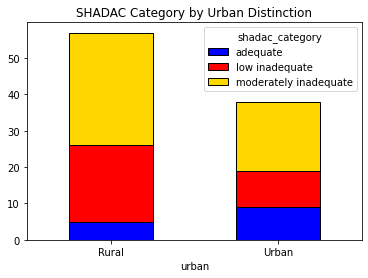

In [50]:
pd.crosstab(physicians['urban'], physicians['shadac_category']).plot(kind = 'bar', 
                                                          stacked = True,       # stacked as opposed to side-by-side
                                                          color = ['blue', 'red', 'gold'],     # change the default colors
                                                          edgecolor = 'black')              # add a border to the bars
plt.title('SHADAC Category by Urban Distinction')                   # add a title
plt.xticks(rotation = 0);                                             # change the appearance of the x tick labels

In [51]:
pd.crosstab(physicians['urban'], physicians['shadac_category'], normalize = 'all')

shadac_category,adequate,low inadequate,moderately inadequate
urban,,,
Rural,0.052632,0.221053,0.326316
Urban,0.094737,0.105263,0.200000


In [52]:
pd.crosstab(physicians['urban'], physicians['shadac_category'], normalize = 'index')

shadac_category,adequate,low inadequate,moderately inadequate
urban,,,
Rural,0.087719,0.368421,0.54386
Urban,0.236842,0.263158,0.50000


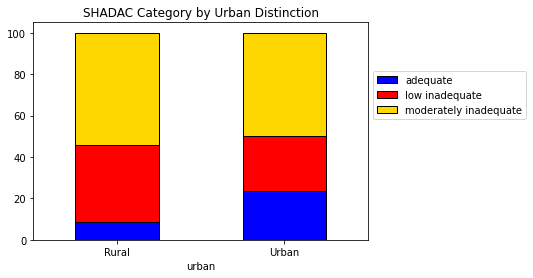

In [54]:
(pd.crosstab(physicians['urban'], physicians['shadac_category'], normalize = 'index')*100).plot(kind = 'bar', 
                                                          stacked = True,       # stacked as opposed to side-by-side
                                                          color = ['blue', 'red', 'gold'],     # change the default colors
                                                          edgecolor = 'black')              # add a border to the bars
plt.title('SHADAC Category by Urban Distinction')                   # add a title
plt.xticks(rotation = 0);                                             # change the appearance of the x tick labels
plt.legend(bbox_to_anchor = (1, 0.8), loc = 'upper left');

3. Merge the unemployment data (contained in tn_unemployment.csv) into the physicians DataFrame.

In [55]:
unemployment = pd.read_csv('../data/tn_unemployment.csv')

In [56]:
unemployment.head(2)

,laus_code,State,County,Name,Period,LF,Employed,Unemployed,unemployment_rate
0,CN4700100000000,47,1,"Anderson County, TN",Mar-21,34704,33010,1694,4.9
1,CN4700300000000,47,3,"Bedford County, TN",Mar-21,20623,19550,1073,5.2


In [57]:
physicians.head(2)

,FIPS,population,urban,county,state,primary_care_physicians,residents_per_pcp,shadac_category
0,47165,183437,Urban,Sumner,TENNESSEE,91.0,2015.791209,moderately inadequate
1,47169,10231,Urban,Trousdale,TENNESSEE,2.0,5115.500000,low inadequate


In [61]:
unemployment['Name'].str.split(' County', expand = True)
unemployment['Name']=unemployment['Name'].str.split(' County', expand = True)[0]
unemployment.head(2)

,laus_code,State,County,Name,Period,LF,Employed,Unemployed,unemployment_rate
0,CN4700100000000,47,1,Anderson,Mar-21,34704,33010,1694,4.9
1,CN4700300000000,47,3,Bedford,Mar-21,20623,19550,1073,5.2


In [63]:
physicians = pd.merge(left = physicians,
         right = unemployment.rename(columns = {'Name': 'county'}))

In [64]:
physicians.head(2)

,FIPS,population,urban,county,state,primary_care_physicians,residents_per_pcp,shadac_category,laus_code,State,County,Period,LF,Employed,Unemployed,unemployment_rate
0,47165,183437,Urban,Sumner,TENNESSEE,91.0,2015.791209,moderately inadequate,CN4716500000000,47,165,Mar-21,103331,98879,4452,4.3
1,47169,10231,Urban,Trousdale,TENNESSEE,2.0,5115.500000,low inadequate,CN4716900000000,47,169,Mar-21,5473,5217,256,4.7
